Anggota Kelompok :
- Faqihuddin Al-Ghiffary (2307336)
- Risdan Iskariman (2305909)

# Input dan Membaca Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import pickle

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Datasets/Tugas Kuliah/regresi/Copy of performa_siswa.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [ ]:
# Memeriksa inkonsistensi format
# Select object type columns
object_cols = df.select_dtypes(include='object').columns

# Print unique values for each object column
for col in object_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values in 'student_id':
['S1000' 'S1001' 'S1002' 'S1003' 'S1004' 'S1005' 'S1006' 'S1007' 'S1008'
 'S1009' 'S1010' 'S1011' 'S1012' 'S1013' 'S1014' 'S1015' 'S1016' 'S1017'
 'S1018' 'S1019' 'S1020' 'S1021' 'S1022' 'S1023' 'S1024' 'S1025' 'S1026'
 'S1027' 'S1028' 'S1029' 'S1030' 'S1031' 'S1032' 'S1033' 'S1034' 'S1035'
 'S1036' 'S1037' 'S1038' 'S1039' 'S1040' 'S1041' 'S1042' 'S1043' 'S1044'
 'S1045' 'S1046' 'S1047' 'S1048' 'S1049' 'S1050' 'S1051' 'S1052' 'S1053'
 'S1054' 'S1055' 'S1056' 'S1057' 'S1058' 'S1059' 'S1060' 'S1061' 'S1062'
 'S1063' 'S1064' 'S1065' 'S1066' 'S1067' 'S1068' 'S1069' 'S1070' 'S1071'
 'S1072' 'S1073' 'S1074' 'S1075' 'S1076' 'S1077' 'S1078' 'S1079' 'S1080'
 'S1081' 'S1082' 'S1083' 'S1084' 'S1085' 'S1086' 'S1087' 'S1088' 'S1089'
 'S1090' 'S1091' 'S1092' 'S1093' 'S1094' 'S1095' 'S1096' 'S1097' 'S1098'
 'S1099' 'S1100' 'S1101' 'S1102' 'S1103' 'S1104' 'S1105' 'S1106' 'S1107'
 'S1108' 'S1109' 'S1110' 'S1111' 'S1112' 'S1113' 'S1114' 'S1115' 'S1116'
 'S1117' 'S1118' 'S1

In [ ]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


# Data Cleaning


In [ ]:
df.dropna(subset=['parental_education_level'], inplace=True)
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [ ]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])
display(duplicate_rows)

Number of duplicate rows: 0


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score


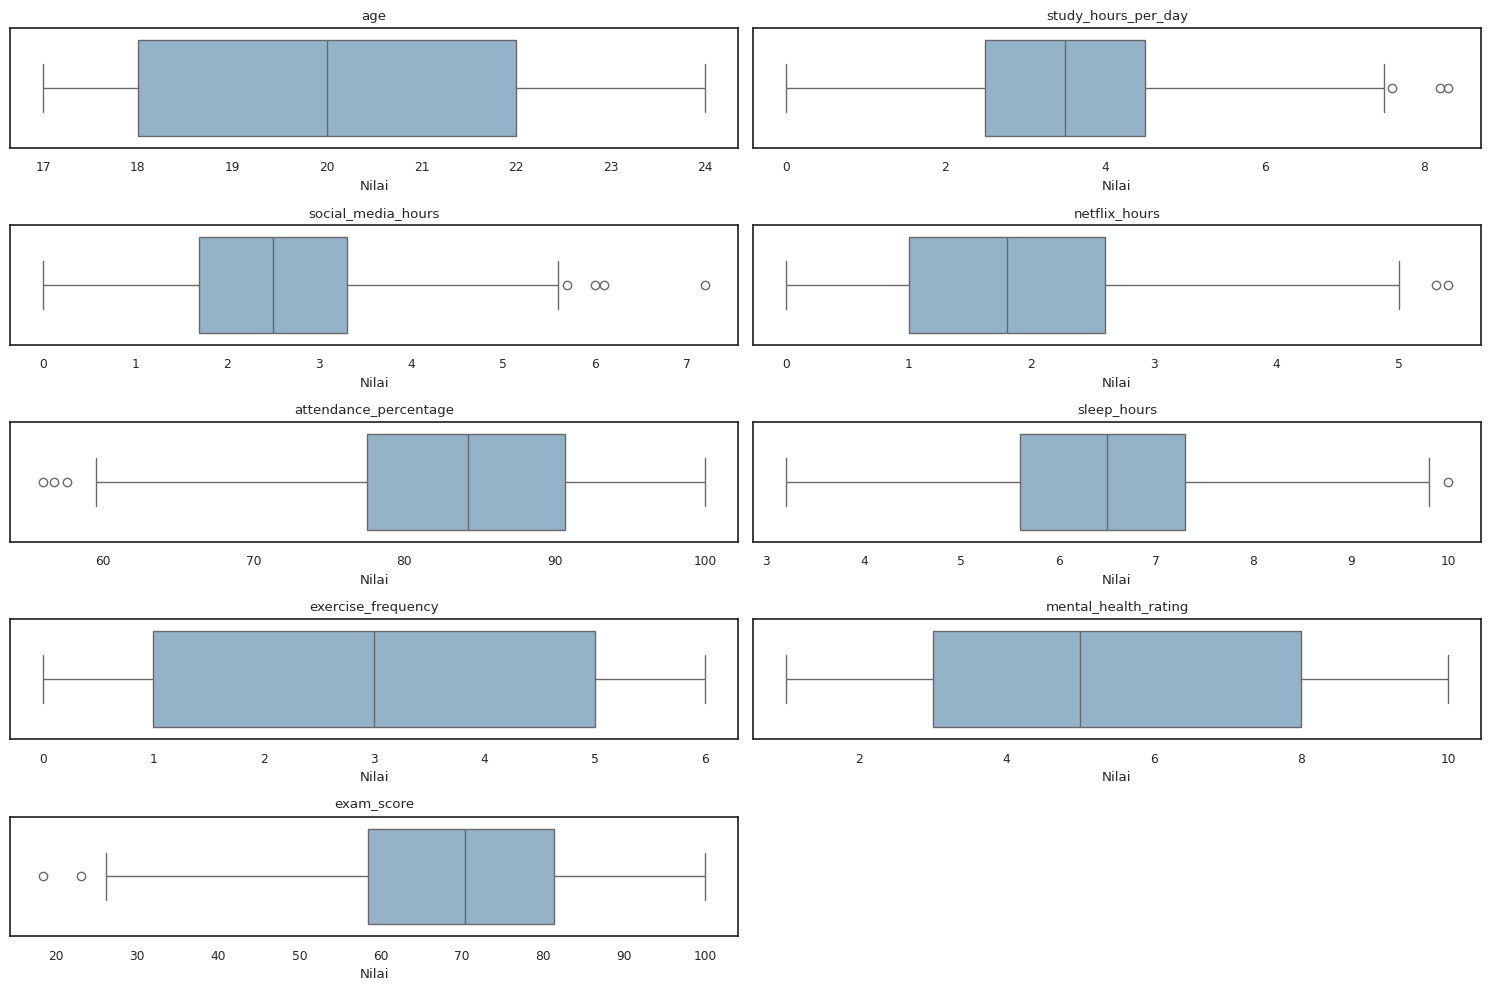

In [ ]:
# Select only numerical columns
numerical_cols = ['age', 'study_hours_per_day', 'social_media_hours',	'netflix_hours', 'attendance_percentage',	'sleep_hours', 'exercise_frequency', 	'mental_health_rating',	'exam_score']

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xlabel('Nilai')

plt.tight_layout()
plt.show()

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Select numerical columns (excluding 'student_id' if it was numerical)
numerical_cols = ['age', 'study_hours_per_day', 'social_media_hours',	'netflix_hours', 'attendance_percentage',	'sleep_hours', 'exercise_frequency', 	'mental_health_rating',	'exam_score']

# Remove outliers from each numerical column
df_cleaned = df.copy() # Create a copy to avoid modifying the original DataFrame in place repeatedly

for col in numerical_cols:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers from all numerical columns: {df_cleaned.shape}")

Original DataFrame shape: (909, 16)
DataFrame shape after removing outliers from all numerical columns: (893, 16)


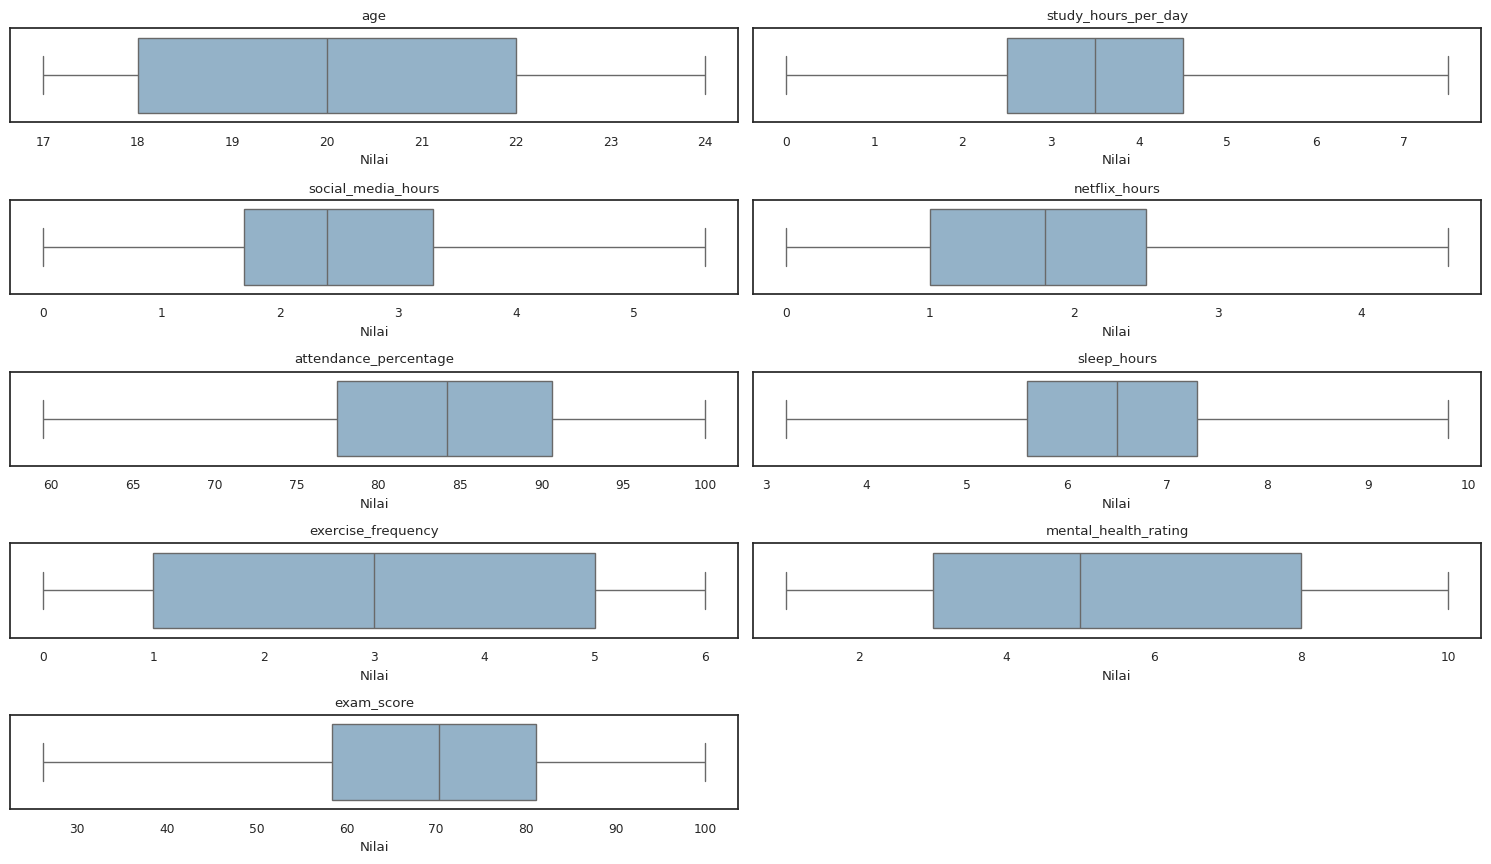

In [ ]:
# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 2, i + 1)
    sns.boxplot(x=df_cleaned[col])
    plt.title(col)
    plt.xlabel('Nilai')

plt.tight_layout()
plt.show()

# EDA

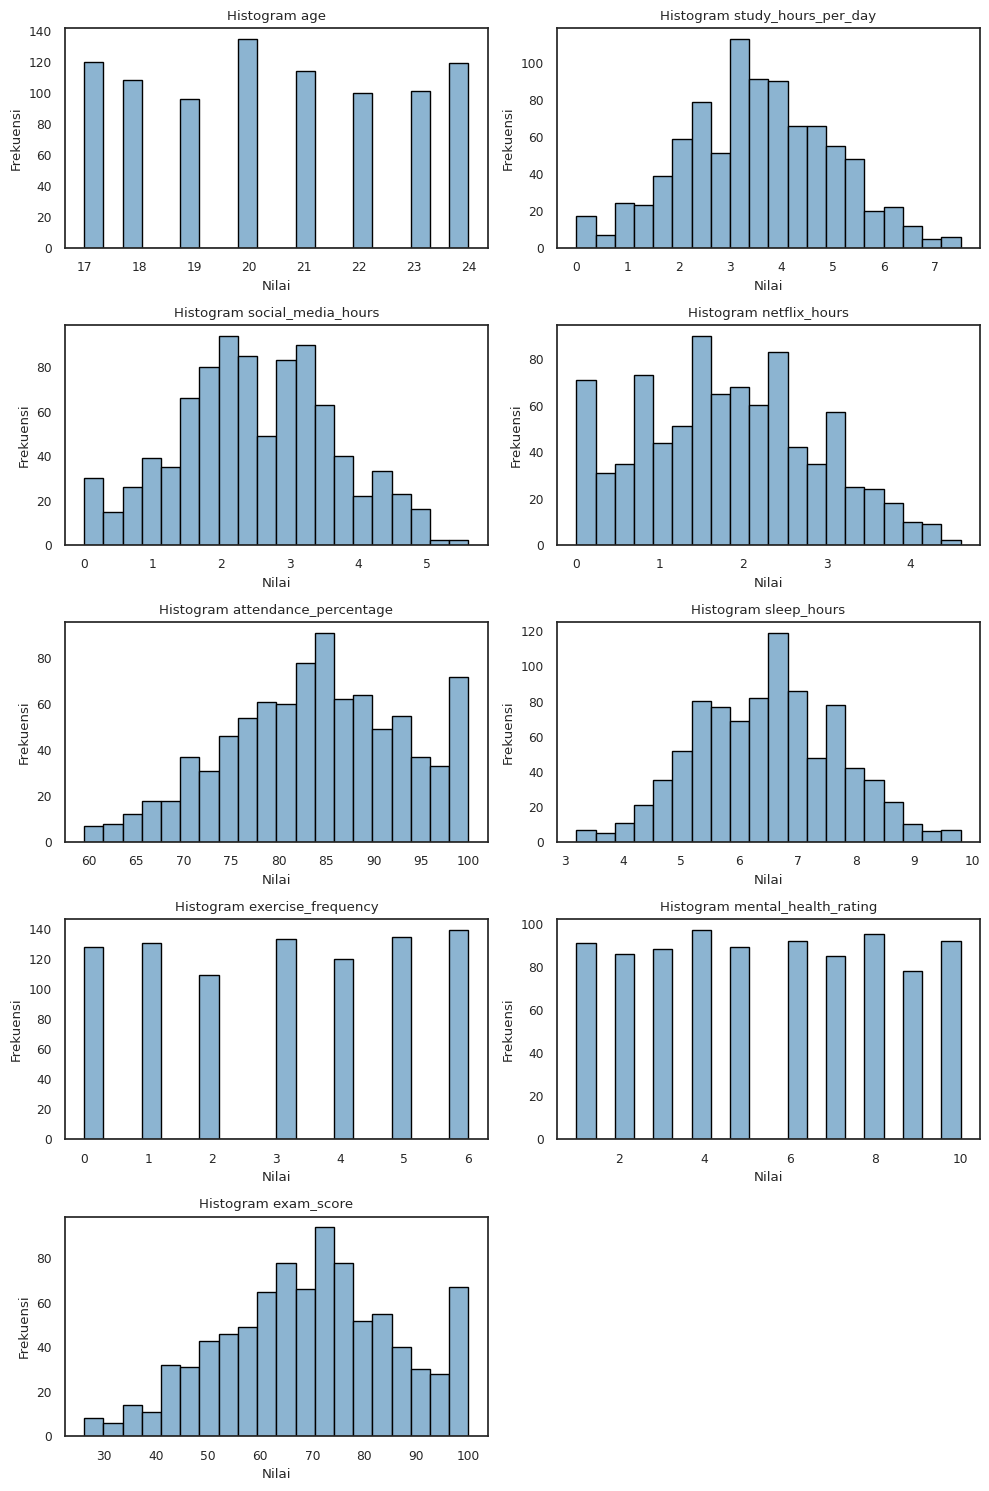

In [ ]:
plt.figure(figsize=(10, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 2, i + 1)
    # Using the 'bins' parameter to specify the number of bins (e.g., 20)
    plt.hist(df_cleaned[col], bins=20, edgecolor='black') # Added bins and edgecolor for clarity
    plt.title('Histogram ' + col)
    plt.ylabel('Frekuensi')
    plt.xlabel('Nilai')

plt.tight_layout()
plt.show()

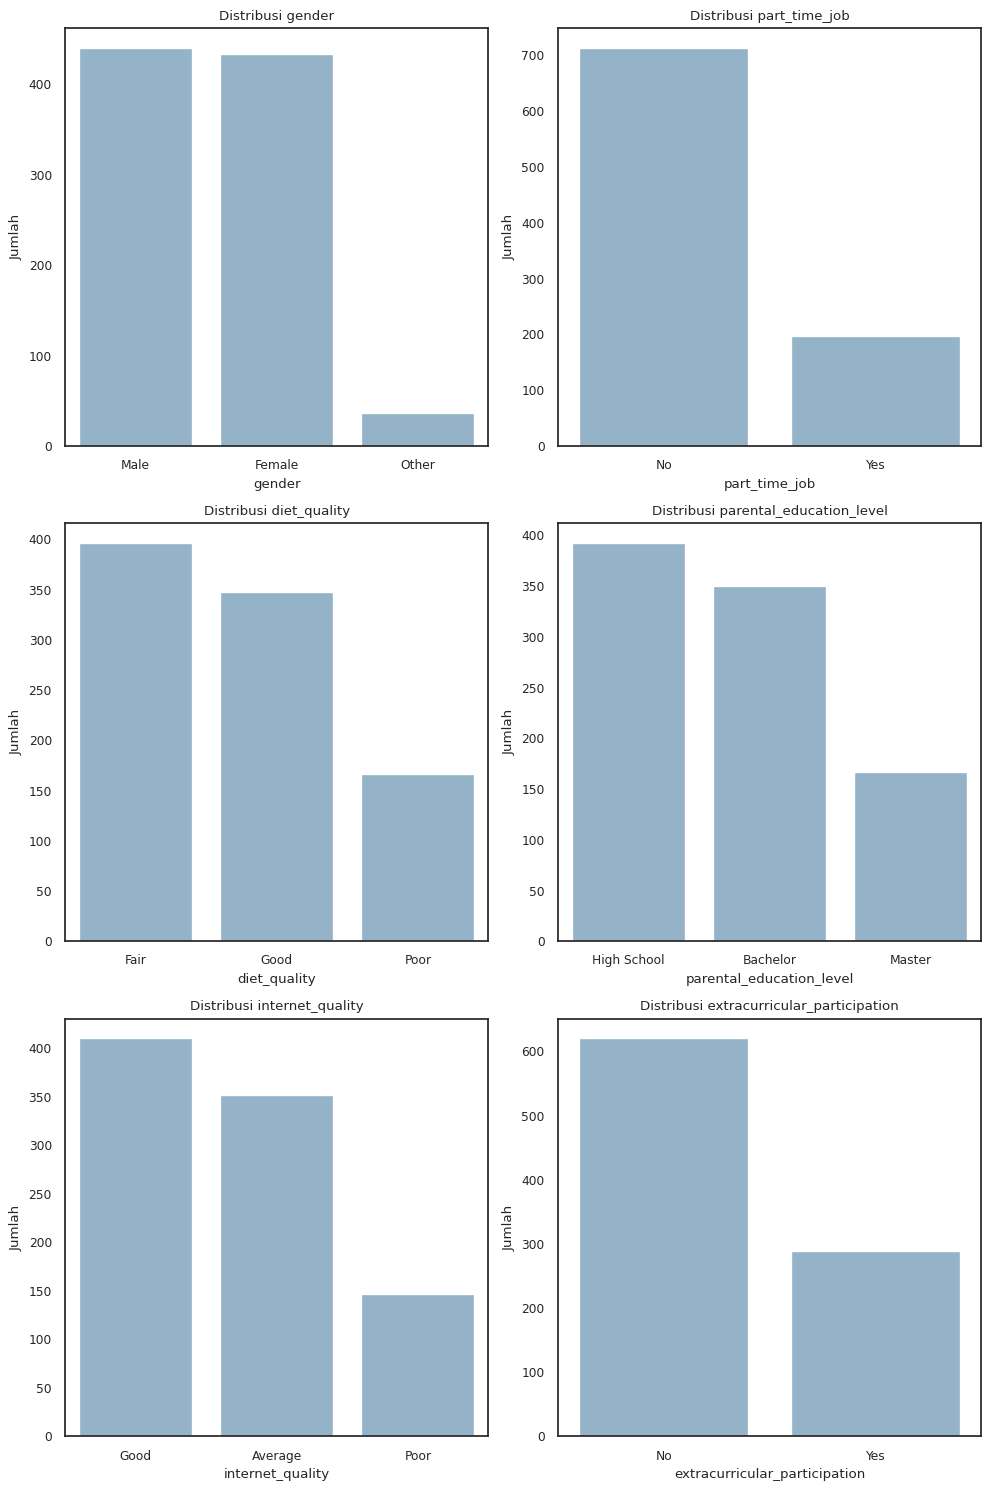

In [ ]:
#Barplot
df = df.drop('student_id', axis=1)
categorical_cols = df.select_dtypes(include='object').columns.to_list()
plt.figure(figsize=(10, 15))
for i, col in enumerate(categorical_cols):
    col_counts = df[col].value_counts().reset_index()
    col_counts.columns = [col, 'count']
    plt.subplot(3, 2, i + 1)
    sns.barplot(x=col, y='count', data=col_counts)
    plt.title('Distribusi ' + col)
    plt.ylabel('Jumlah')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# Menghitung rata-rata exam_score berdasarkan pekerjaan paruh waktu
avg_scores = df.groupby("part_time_job")["exam_score"].mean()
print("Rata-rata nilai ujian berdasarkan pekerjaan paruh waktu:\n")
print(avg_scores)

Rata-rata nilai ujian berdasarkan pekerjaan paruh waktu:

part_time_job
No     69.708275
Yes    69.012245
Name: exam_score, dtype: float64


In [ ]:
# Menghitung rata-rata jam tidur siswa
avg_sleep = df["sleep_hours"].mean()
print("Rata-rata jam tidur siswa per hari:", avg_sleep)

# Hitung rata-rata waktu untuk media sosial dan Netflix
avg_social = df["social_media_hours"].mean()
avg_netflix = df["netflix_hours"].mean()

print("Rata-rata waktu media sosial per hari:", avg_social)
print("Rata-rata waktu Netflix per hari:", avg_netflix)

if avg_social > avg_netflix:
    print("\nKesimpulan: Siswa lebih banyak menghabiskan waktu di MEDIA SOSIAL.")
else:
    print("\nKesimpulan: Siswa lebih banyak menghabiskan waktu di NETFLIX.")

# Hitung persentase siswa dengan kehadiran < 75%
low_attendance = (df["attendance_percentage"] < 75).mean() * 100
print(f"Persentase siswa dengan tingkat kehadiran < 75%: {low_attendance:.2f}%")

Rata-rata jam tidur siswa per hari: 6.474037403740374
Rata-rata waktu media sosial per hari: 2.504620462046205
Rata-rata waktu Netflix per hari: 1.8303630363036305

Kesimpulan: Siswa lebih banyak menghabiskan waktu di MEDIA SOSIAL.
Persentase siswa dengan tingkat kehadiran < 75%: 18.15%


# Feature Engineering


In [ ]:
#One-hot Encoding
df_encoded = df_cleaned.copy()
#Gender
gender_encoded = pd.get_dummies(df_encoded['gender'], prefix='gender', dtype=int)

gender_index = df.columns.get_loc('gender')
for i, col in enumerate(gender_encoded.columns):
  df_encoded.insert(gender_index + 1 + i, col, gender_encoded[col])

df_encoded = df_encoded.drop(['gender', 'gender_Other'], axis=1) # Drop the original 'gender' column

#Part time job
part_time_job_encoded = pd.get_dummies(df_encoded['part_time_job'], prefix='part_time_job', dtype=int)

part_time_job_index = df_encoded.columns.get_loc('part_time_job')
for i, col in enumerate(part_time_job_encoded.columns):
  df_encoded.insert(part_time_job_index + 1 + i, col, part_time_job_encoded[col])

df_encoded = df_encoded.drop(['part_time_job', 'part_time_job_No'], axis=1)

#extracurricular_participation
extracurricular_participation_encoded =  pd.get_dummies(df_encoded['extracurricular_participation'], prefix='extracurricular_participation', dtype=int)

extracurricular_participation_index = df_encoded.columns.get_loc('extracurricular_participation')
for i, col in enumerate(extracurricular_participation_encoded.columns):
  df_encoded.insert(extracurricular_participation_index + 1 + i, col, extracurricular_participation_encoded[col])

df_encoded = df_encoded.drop(['extracurricular_participation', 'extracurricular_participation_No'], axis=1)

#Mapping untuk data ordinal
#diet quality
diet_quality_encoded = df_encoded['diet_quality'].map({'Good': 3, 'Fair': 2, 'Poor': 1})

diet_quality_index = df_encoded.columns.get_loc('diet_quality')
df_encoded.insert(diet_quality_index + 1, 'diet_quality_encoded', diet_quality_encoded)

df_encoded = df_encoded.drop(['diet_quality'], axis=1)

#parental education level
parental_education_level_encoded = df_encoded['parental_education_level'].map({'Master': 3, 'Bachelor': 2, 'High School': 1})

parental_education_level_index = df_encoded.columns.get_loc('parental_education_level')
df_encoded.insert(parental_education_level_index + 1, 'parental_education_level_encoded', parental_education_level_encoded)

df_encoded = df_encoded.drop(['parental_education_level'], axis=1)

#internet quality
internet_quality_encoded = df_encoded['internet_quality'].map({'Good': 3, 'Average': 2, 'Poor': 1})

internet_quality_index = df_encoded.columns.get_loc('internet_quality')
df_encoded.insert(internet_quality_index + 1, 'internet_quality_encoded', internet_quality_encoded)

df_encoded = df_encoded.drop(['internet_quality'], axis=1)
df_encoded

,student_id,age,gender_Female,gender_Male,study_hours_per_day,social_media_hours,netflix_hours,part_time_job_Yes,attendance_percentage,sleep_hours,diet_quality_encoded,exercise_frequency,parental_education_level_encoded,internet_quality_encoded,mental_health_rating,extracurricular_participation_Yes,exam_score
0,S1000,23,1,0,0.0,1.2,1.1,0,85.0,8.0,2,6,3,2,8,1,56.2
1,S1001,20,1,0,6.9,2.8,2.3,0,97.3,4.6,3,6,1,2,8,0,100.0
2,S1002,21,0,1,1.4,3.1,1.3,0,94.8,8.0,1,1,1,1,1,0,34.3
3,S1003,23,1,0,1.0,3.9,1.0,0,71.0,9.2,1,4,3,3,1,1,26.8
4,S1004,19,1,0,5.0,4.4,0.5,0,90.9,4.9,2,3,3,3,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,1,0,2.6,0.5,1.6,0,77.0,7.5,2,2,1,3,6,1,76.1
996,S1996,17,1,0,2.9,1.0,2.4,1,86.0,6.8,1,1,1,2,6,1,65.9
997,S1997,20,0,1,3.0,2.6,1.3,0,61.9,6.5,3,5,2,3,9,1,64.4
998,S1998,24,0,1,5.4,4.1,1.1,1,100.0,7.6,2,0,2,2,1,0,69.7


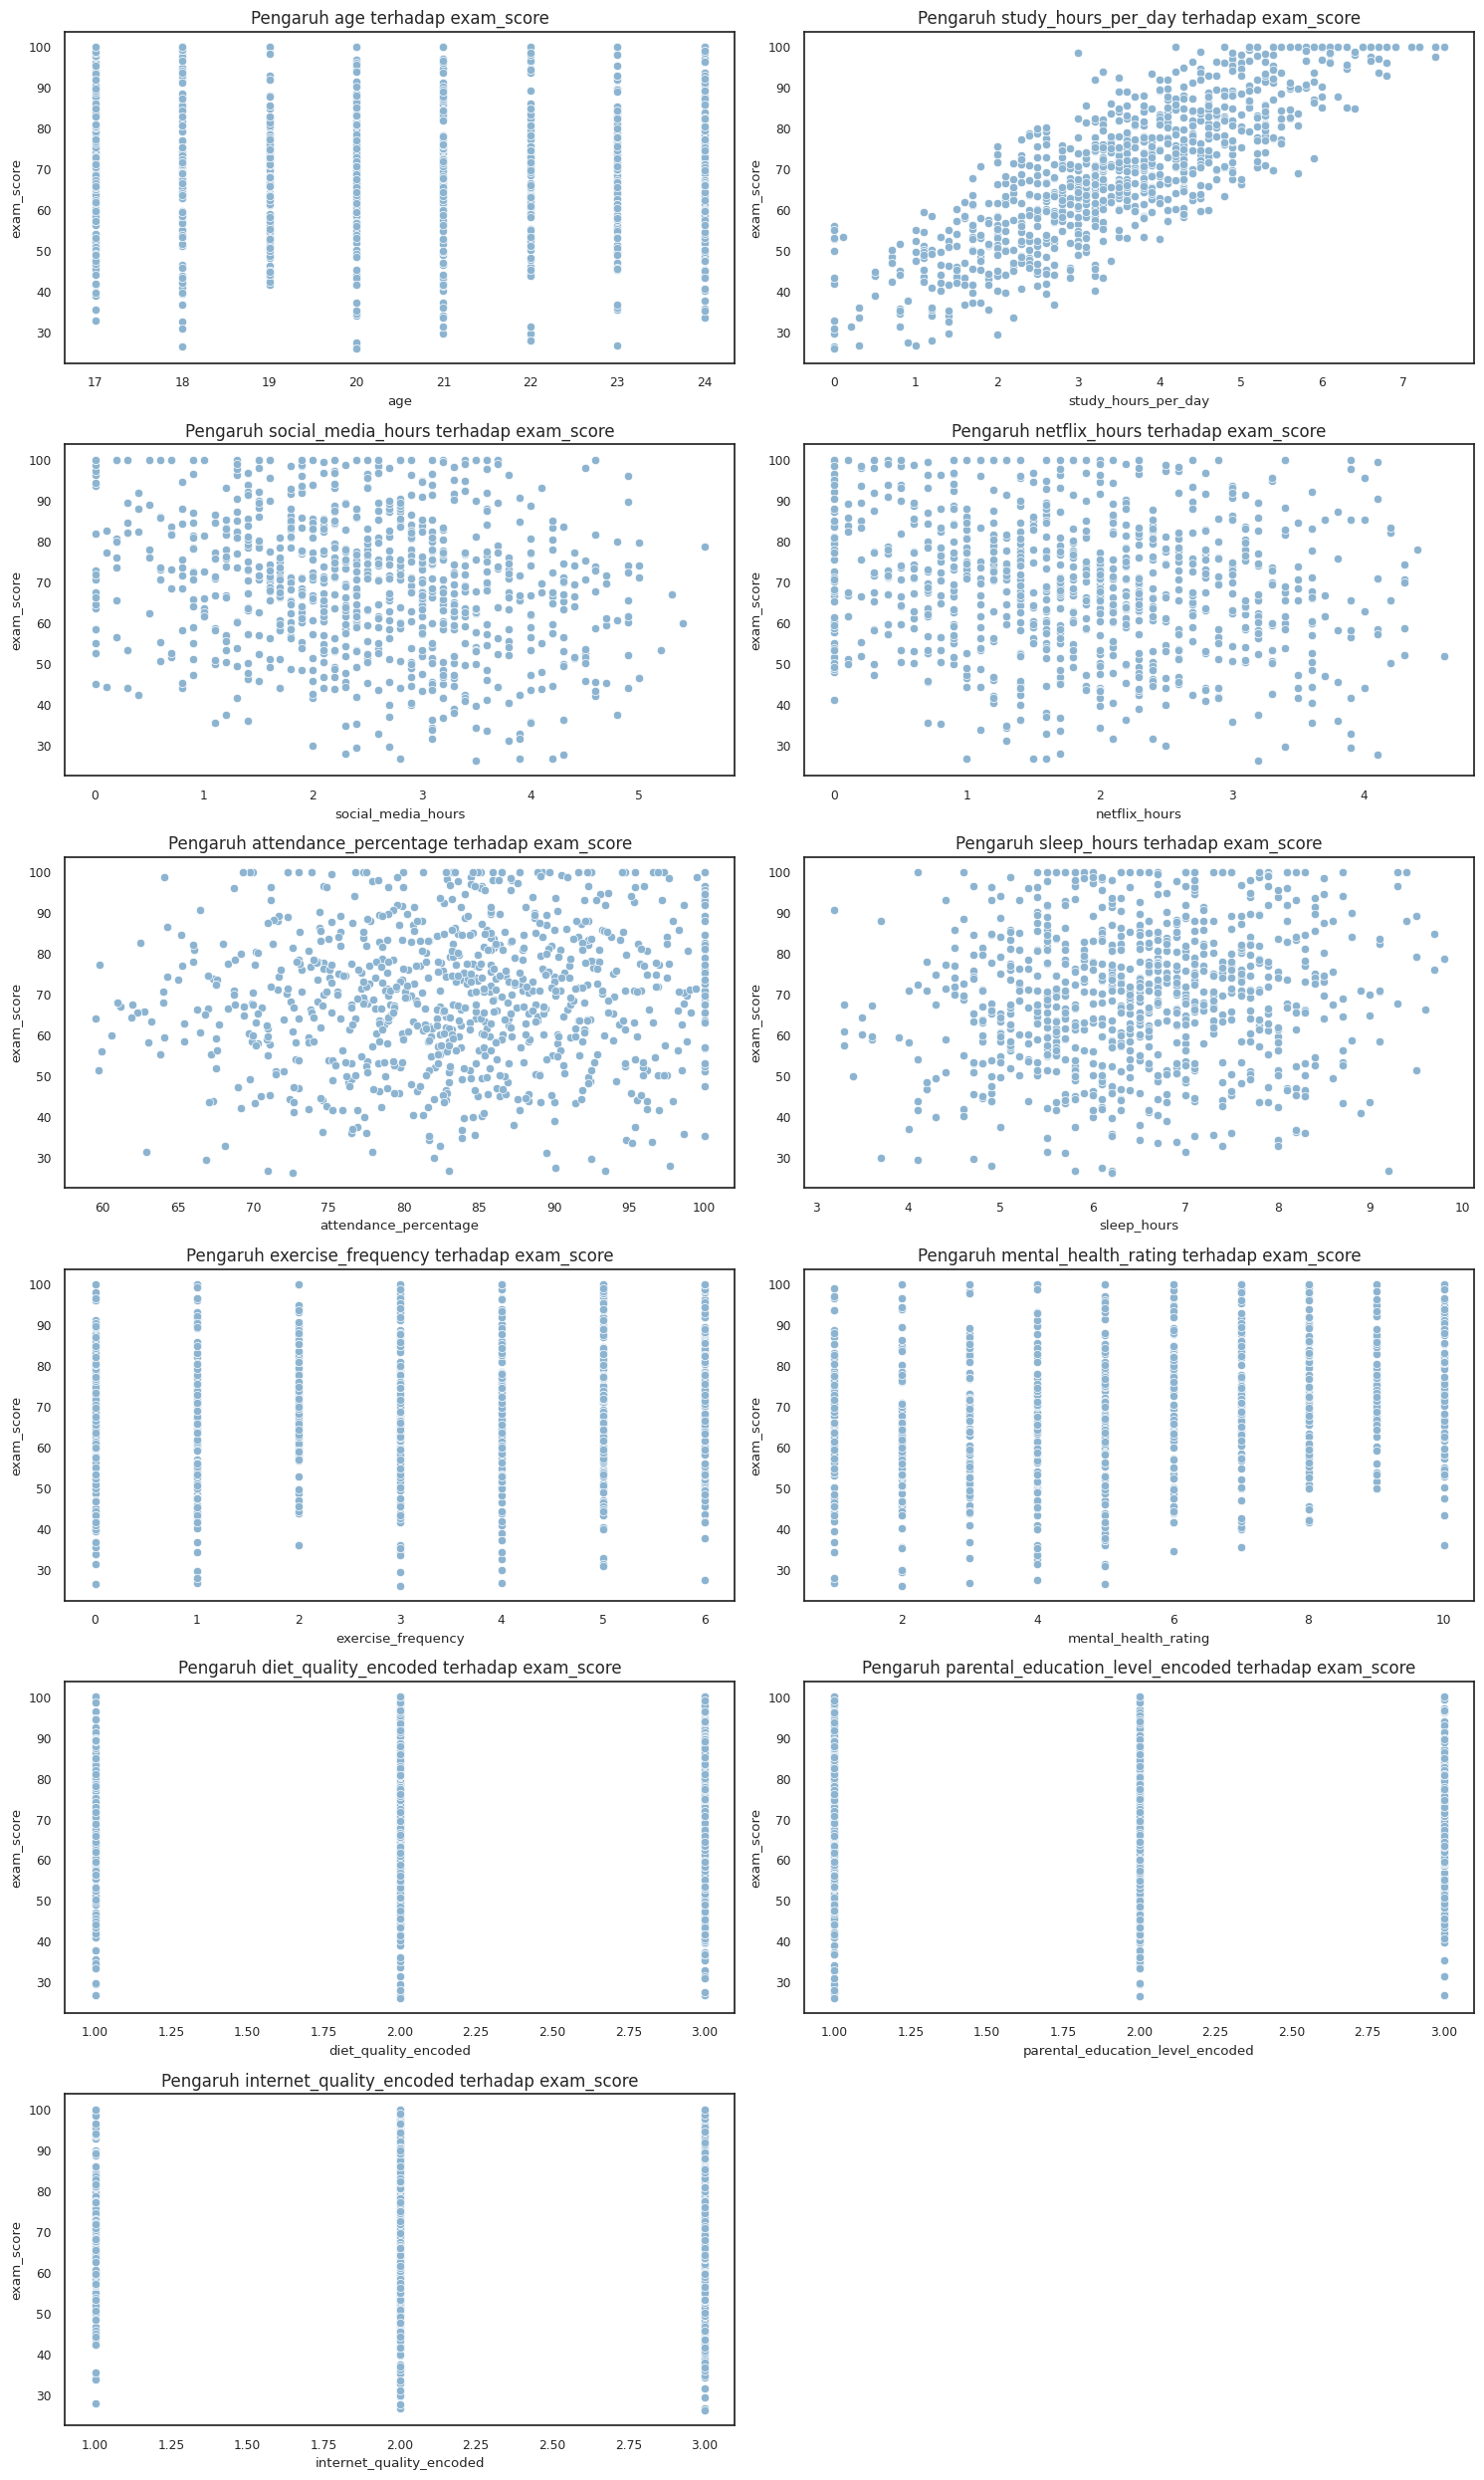

In [ ]:
numerical_cols_for_regplot = ['age', 'study_hours_per_day', 'social_media_hours',       'netflix_hours', 'attendance_percentage',       'sleep_hours', 'exercise_frequency',    'mental_health_rating', 'diet_quality_encoded', 'parental_education_level_encoded', 'internet_quality_encoded']

plt.figure(figsize=(15, 25))
for i, col in enumerate(numerical_cols_for_regplot):
    plt.subplot(6, 2, i + 1)
    sns.scatterplot(x=df_encoded[col], y=df_encoded["exam_score"])
    plt.title('Pengaruh ' + col + ' terhadap exam_score', fontsize=12) # Added fontsize parameter
    plt.ylabel('exam_score')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

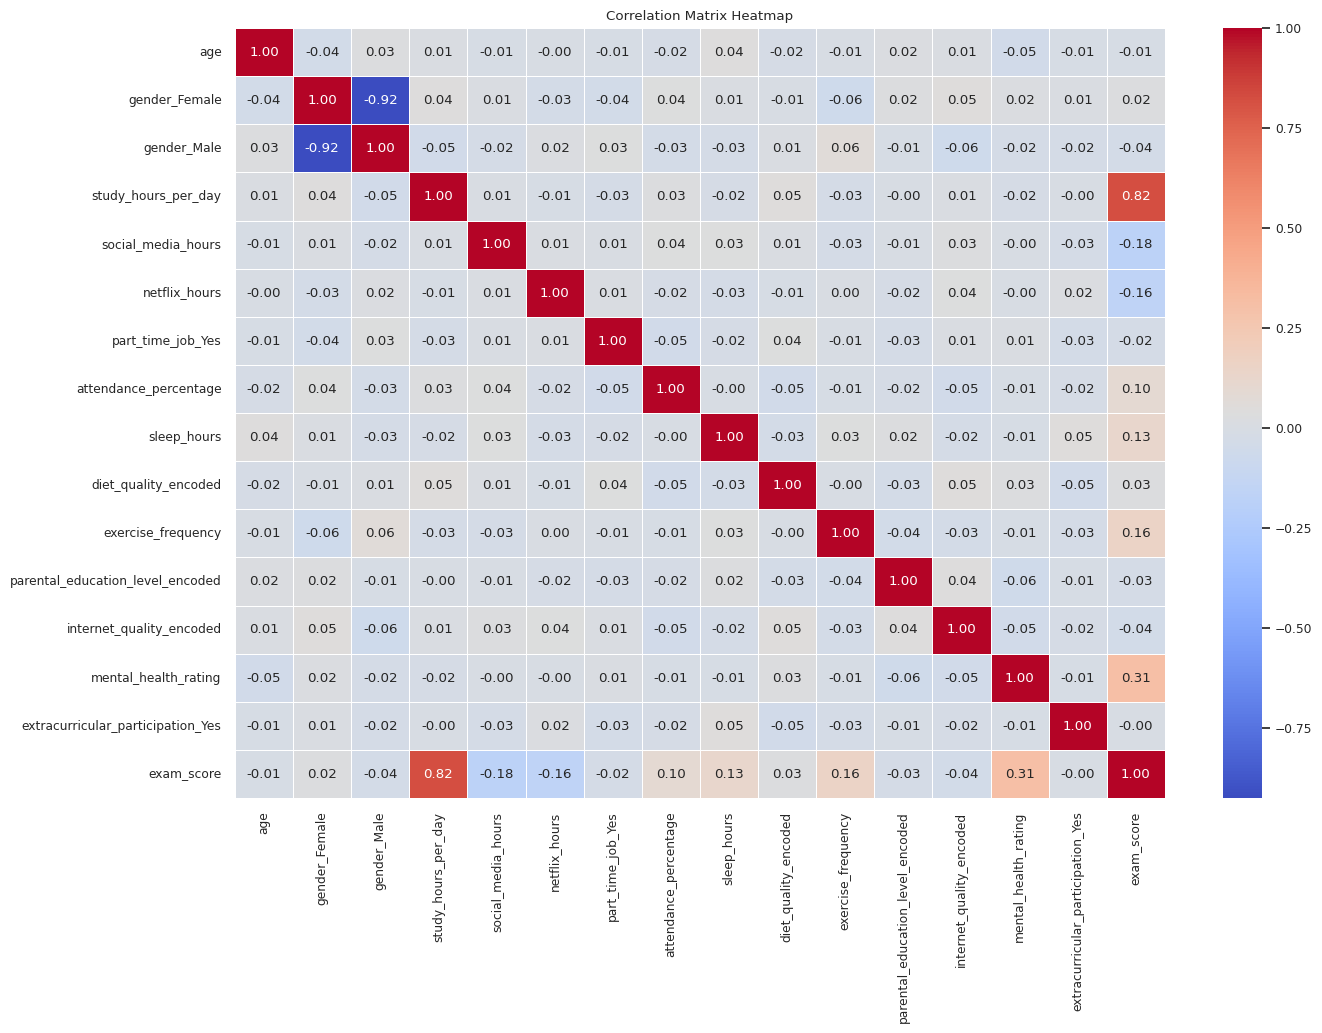

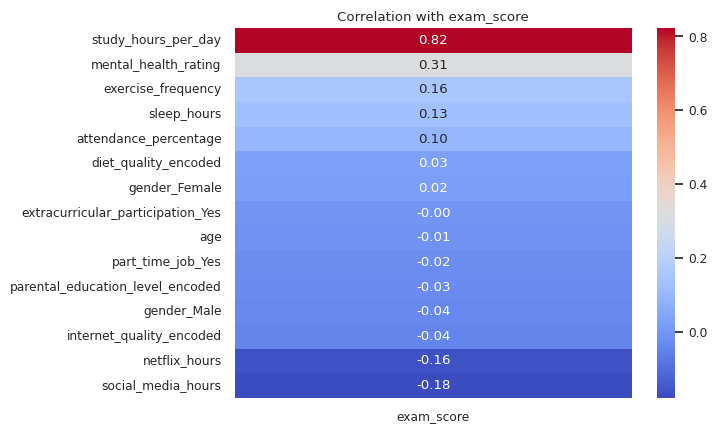

In [ ]:
corr_matrix = df_encoded.drop('student_id', axis=1).corr()

#Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

#Tingkat Korelasi
corr_martix2 = df_encoded.drop('student_id', axis=1).corr()
target_corr = corr_martix2['exam_score'].drop('exam_score')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style('white')
sns.set_palette('PuBuGn_d')
sns.heatmap(target_corr_sorted.to_frame(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation with exam_score')
plt.show()

# Training and Evaluation


Regresi linear sederhana dengan fitur 'study_hours_per_day' dan target 'exam_score'

In [ ]:
# Train test split
x = df_encoded[['study_hours_per_day']]
y = df_encoded[['exam_score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
slr_1 = LinearRegression()
slr_1.fit(x_train, y_train)

print('intercept: ' + str(slr_1.intercept_))
print('coef: ' + str(slr_1.coef_))

y_pred = slr_1.predict(x_test)
df_comp = pd.DataFrame({'Actual': y_test['exam_score'], 'Predicted': y_pred.flatten()})
print(df_comp)

print('MAE: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R Squared: ' + str(metrics.r2_score(y_test, y_pred)))

intercept: [35.396784]
coef: [[9.65407011]]
     Actual   Predicted
798    90.6   84.632542
489   100.0  106.836903
587    71.4   76.909285
810    80.7   77.874693
41     66.0   63.393587
..      ...         ...
479    43.3   53.739517
867    94.5   87.528763
26     73.5   54.704924
89     41.1   46.981668
11     74.4   73.047657

[179 rows x 2 columns]
MAE: 7.515076604738745
MSE: 86.89690851919181
RMSE: 9.321851131572087
R Squared: 0.6918223107955932


In [ ]:
# K-fold cross validation
folds = KFold(n_splits=4, shuffle=True, random_state=0)

scores = cross_val_score(slr_1, x, y, scoring='r2', cv=folds)
print(scores)
print('Rata-rata R2: ' + str(scores.mean()))

scores = cross_val_score(slr_1, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_absolute_error: ' + str(scores.mean()))

scores = cross_val_score(slr_1, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_squared_error: ' + str(scores.mean()))

scores = cross_val_score(slr_1, x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_root_mean_squared_error: ' + str(scores.mean()))

[0.68173169 0.6897854  0.68442811 0.64103515]
Rata-rata R2: 0.6742450881903739
[-7.38626524 -7.43890732 -7.55382524 -8.58371389]
Rata-rata neg_mean_absolute_error: -7.740677921716442
[ -86.56433102  -83.84662461  -86.31865622 -109.03061746]
Rata-rata neg_mean_squared_error: -91.44005733107132
[ -9.30399543  -9.15678025  -9.2907834  -10.44177272]
Rata-rata neg_root_mean_squared_error: -9.548332951385701


Regresi linear sederhana dengan fitur 'mental_health_rating' dan target 'exam_score'

In [ ]:
# Train test split
x = df_encoded[['mental_health_rating']]
y = df_encoded[['exam_score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
slr_2 = LinearRegression()
slr_2.fit(x_train, y_train)

print('intercept: ' + str(slr_2.intercept_))
print('coef: ' + str(slr_2.coef_))

y_pred = slr_2.predict(x_test)
df_comp = pd.DataFrame({'Actual': y_test['exam_score'], 'Predicted': y_pred.flatten()})
print(df_comp)

print('MAE: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R Squared: ' + str(metrics.r2_score(y_test, y_pred)))

intercept: [59.18780292]
coef: [[1.89528187]]
     Actual  Predicted
798    90.6  78.140622
489   100.0  70.559494
587    71.4  68.664212
810    80.7  78.140622
41     66.0  61.083085
..      ...        ...
479    43.3  66.768930
867    94.5  62.978367
26     73.5  66.768930
89     41.1  66.768930
11     74.4  61.083085

[179 rows x 2 columns]
MAE: 12.957903212658584
MSE: 260.33042925291704
RMSE: 16.13475841941605
R Squared: 0.07674471412252437


In [ ]:
# K-fold cross validation
folds = KFold(n_splits=4, shuffle=True, random_state=0)

scores = cross_val_score(slr_2, x, y, scoring='r2', cv=folds)
print(scores)
print('Rata-rata R2: ' + str(scores.mean()))

scores = cross_val_score(slr_2, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_absolute_error: ' + str(scores.mean()))

scores = cross_val_score(slr_2, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_squared_error: ' + str(scores.mean()))

scores = cross_val_score(slr_2, x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_root_mean_squared_error: ' + str(scores.mean()))

[0.14044347 0.03015312 0.05099922 0.12463147]
Rata-rata R2: 0.0865568198205702
[-12.19160686 -13.19883794 -12.91061189 -13.074483  ]
Rata-rata neg_mean_absolute_error: -12.843884924764462
[-233.78682091 -262.13591259 -259.5810191  -265.88110482]
Rata-rata neg_mean_squared_error: -255.34621435548902
[-15.29008898 -16.19061187 -16.11151821 -16.30586106]
Rata-rata neg_root_mean_squared_error: -15.974520027963585


Regresi linear sederhana dengan fitur 'exersice_frequency' dan target 'exam_score'

In [ ]:
# Train test split
x = df_encoded[['exercise_frequency']]
y = df_encoded[['exam_score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
slr_3 = LinearRegression()
slr_3.fit(x_train, y_train)

print('intercept: ' + str(slr_3.intercept_))
print('coef: ' + str(slr_3.coef_))

y_pred = slr_3.predict(x_test)
df_comp = pd.DataFrame({'Actual': y_test['exam_score'], 'Predicted': y_pred.flatten()})
print(df_comp)

print('MAE: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R Squared: ' + str(metrics.r2_score(y_test, y_pred)))

intercept: [65.07737942]
coef: [[1.4700467]]
     Actual  Predicted
798    90.6  66.547426
489   100.0  69.487520
587    71.4  70.957566
810    80.7  66.547426
41     66.0  73.897660
..      ...        ...
479    43.3  72.427613
867    94.5  73.897660
26     73.5  70.957566
89     41.1  70.957566
11     74.4  68.017473

[179 rows x 2 columns]
MAE: 13.673518128173114
MSE: 283.4244812522756
RMSE: 16.835215509528698
R Squared: -0.005157757447645128


In [ ]:
folds = KFold(n_splits=4, shuffle=True, random_state=0)

scores = cross_val_score(slr_3, x, y, scoring='r2', cv=folds)
print(scores)
print('Rata-rata R2: ' + str(scores.mean()))

scores = cross_val_score(slr_3, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_absolute_error: ' + str(scores.mean()))

scores = cross_val_score(slr_3, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_squared_error: ' + str(scores.mean()))

scores = cross_val_score(slr_3, x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_root_mean_squared_error: ' + str(scores.mean()))

[-0.00982157  0.02012909  0.02362687  0.02712158]
Rata-rata R2: 0.015263990960511037
[-13.26863406 -13.23031783 -13.22580271 -14.17065   ]
Rata-rata neg_mean_absolute_error: -13.473851149298522
[-274.65671925 -264.84526648 -267.06820146 -295.49838734]
Rata-rata neg_mean_squared_error: -275.5171436343353
[-16.57277042 -16.2740673  -16.34222144 -17.19006653]
Rata-rata neg_root_mean_squared_error: -16.59478142065357


Regresi linear sederhana dengan fitur 'sleep_hours' dan target 'exam_score'

In [ ]:
# Train test split
x = df_encoded[['sleep_hours']]
y = df_encoded[['exam_score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
slr_4 = LinearRegression()
slr_4.fit(x_train, y_train)

print('intercept: ' + str(slr_4.intercept_))
print('coef: ' + str(slr_4.coef_))

y_pred = slr_4.predict(x_test)
df_comp = pd.DataFrame({'Actual': y_test['exam_score'], 'Predicted': y_pred.flatten()})
print(df_comp)

print('MAE: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R Squared: ' + str(metrics.r2_score(y_test, y_pred)))

intercept: [60.17807346]
coef: [[1.45069824]]
     Actual  Predicted
798    90.6  70.623101
489   100.0  70.478031
587    71.4  71.058310
810    80.7  68.011844
41     66.0  70.623101
..      ...        ...
479    43.3  68.447053
867    94.5  72.509009
26     73.5  69.607612
89     41.1  69.752682
11     74.4  71.638590

[179 rows x 2 columns]
MAE: 13.252366654941575
MSE: 272.28949905112904
RMSE: 16.50119689753228
R Squared: 0.03433217542290867


In [ ]:
folds = KFold(n_splits=4, shuffle=True, random_state=0)

scores = cross_val_score(slr_4, x, y, scoring='r2', cv=folds)
print(scores)
print('Rata-rata R2: ' + str(scores.mean()))

scores = cross_val_score(slr_4, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_absolute_error: ' + str(scores.mean()))

scores = cross_val_score(slr_4, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_squared_error: ' + str(scores.mean()))

scores = cross_val_score(slr_4, x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_root_mean_squared_error: ' + str(scores.mean()))

[ 0.01775133 -0.0202102  -0.01037922  0.02701547]
Rata-rata R2: 0.0035443426000698053
[-12.8224149  -13.47868655 -13.383734   -14.02943475]
Rata-rata neg_mean_absolute_error: -13.428567547578751
[-267.15729333 -275.74840527 -276.36991823 -295.53061816]
Rata-rata neg_mean_squared_error: -278.701558746138
[-16.34494703 -16.60567389 -16.62437723 -17.19100399]
Rata-rata neg_root_mean_squared_error: -16.6915005331939


Regresi linear sederhana dengan fitur 'attendance_percentage' dan target 'exam_score'

In [ ]:
# Train test split
x = df_encoded[['attendance_percentage']]
y = df_encoded[['exam_score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
slr_5 = LinearRegression()
slr_5.fit(x_train, y_train)

print('intercept: ' + str(slr_5.intercept_))
print('coef: ' + str(slr_5.coef_))

y_pred = slr_5.predict(x_test)
df_comp = pd.DataFrame({'Actual': y_test['exam_score'], 'Predicted': y_pred.flatten()})
print(df_comp)

print('MAE: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R Squared: ' + str(metrics.r2_score(y_test, y_pred)))

intercept: [48.59402494]
coef: [[0.24945803]]
     Actual  Predicted
798    90.6  68.376047
489   100.0  71.444381
587    71.4  68.276264
810    80.7  68.850017
41     66.0  70.097307
..      ...        ...
479    43.3  71.394489
867    94.5  73.539828
26     73.5  69.498608
89     41.1  66.729624
11     74.4  66.480166

[179 rows x 2 columns]
MAE: 13.775624478914125
MSE: 293.3618644647953
RMSE: 17.127809680890177
R Squared: -0.040400435781784205


In [ ]:
folds = KFold(n_splits=4, shuffle=True, random_state=0)

scores = cross_val_score(slr_5, x, y, scoring='r2', cv=folds)
print(scores)
print('Rata-rata R2: ' + str(scores.mean()))

scores = cross_val_score(slr_5, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_absolute_error: ' + str(scores.mean()))

scores = cross_val_score(slr_5, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_squared_error: ' + str(scores.mean()))

scores = cross_val_score(slr_5, x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_root_mean_squared_error: ' + str(scores.mean()))

[0.00838215 0.00317542 0.00031698 0.00049794]
Rata-rata R2: 0.0030931230028482526
[-12.97235157 -13.39197951 -13.30410919 -14.20892602]
Rata-rata neg_mean_absolute_error: -13.469341570014915
[-269.70557161 -269.42760261 -273.44417643 -303.58495108]
Rata-rata neg_mean_squared_error: -279.04057543289775
[-16.42271511 -16.41424999 -16.53614757 -17.42368936]
Rata-rata neg_root_mean_squared_error: -16.69920050775061


Regresi linear sederhana dengan fitur 'netflix_hours' dan target 'exam_score'

In [ ]:
# Train test split
x = df_encoded[['netflix_hours']]
y = df_encoded[['exam_score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
slr_6 = LinearRegression()
slr_6.fit(x_train, y_train)

print('intercept: ' + str(slr_6.intercept_))
print('coef: ' + str(slr_6.coef_))

y_pred = slr_6.predict(x_test)
df_comp = pd.DataFrame({'Actual': y_test['exam_score'], 'Predicted': y_pred.flatten()})
print(df_comp)

print('MAE: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R Squared: ' + str(metrics.r2_score(y_test, y_pred)))

intercept: [74.15701706]
coef: [[-2.53940457]]
     Actual  Predicted
798    90.6  66.538803
489   100.0  70.855791
587    71.4  69.078208
810    80.7  70.601851
41     66.0  68.316387
..      ...        ...
479    43.3  68.316387
867    94.5  70.347910
26     73.5  72.887315
89     41.1  74.157017
11     74.4  67.808506

[179 rows x 2 columns]
MAE: 13.3586899719331
MSE: 273.2562084166935
RMSE: 16.530463043021314
R Squared: 0.03090376509751591


In [ ]:
folds = KFold(n_splits=4, shuffle=True, random_state=0)

scores = cross_val_score(slr_6, x, y, scoring='r2', cv=folds)
print(scores)
print('Rata-rata R2: ' + str(scores.mean()))

scores = cross_val_score(slr_6, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_absolute_error: ' + str(scores.mean()))

scores = cross_val_score(slr_6, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_squared_error: ' + str(scores.mean()))

scores = cross_val_score(slr_6, x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_root_mean_squared_error: ' + str(scores.mean()))

[ 0.05321421  0.00366005 -0.03409248  0.03352611]
Rata-rata R2: 0.014076974626669653
[-12.81388178 -13.30232935 -13.36801586 -14.00435179]
Rata-rata neg_mean_absolute_error: -13.372144693450617
[-257.51190588 -269.29661352 -282.85622678 -293.55309869]
Rata-rata neg_mean_squared_error: -275.8044612187051
[-16.04717751 -16.4102594  -16.81833008 -17.13339134]
Rata-rata neg_root_mean_squared_error: -16.602289580760758


Regresi linear sederhana dengan fitur 'social_media_hours' dan target 'exam_score'

In [ ]:
# Train test split
x = df_encoded[['social_media_hours']]
y = df_encoded[['exam_score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
slr_7 = LinearRegression()
slr_7.fit(x_train, y_train)

print('intercept: ' + str(slr_7.intercept_))
print('coef: ' + str(slr_7.coef_))

y_pred = slr_7.predict(x_test)
df_comp = pd.DataFrame({'Actual': y_test['exam_score'], 'Predicted': y_pred.flatten()})
print(df_comp)

print('MAE: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R Squared: ' + str(metrics.r2_score(y_test, y_pred)))

intercept: [76.46404908]
coef: [[-2.77789503]]
     Actual  Predicted
798    90.6  65.630258
489   100.0  66.463627
587    71.4  73.408365
810    80.7  75.908470
41     66.0  70.074891
..      ...        ...
479    43.3  68.130364
867    94.5  68.130364
26     73.5  74.241733
89     41.1  66.463627
11     74.4  69.797101

[179 rows x 2 columns]
MAE: 13.375663429486673
MSE: 277.842417744927
RMSE: 16.668605752879483
R Squared: 0.014638889659852494


In [ ]:
folds = KFold(n_splits=4, shuffle=True, random_state=0)

scores = cross_val_score(slr_7, x, y, scoring='r2', cv=folds)
print(scores)
print('Rata-rata R2: ' + str(scores.mean()))

scores = cross_val_score(slr_7, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_absolute_error: ' + str(scores.mean()))

scores = cross_val_score(slr_7, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_squared_error: ' + str(scores.mean()))

scores = cross_val_score(slr_7, x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_root_mean_squared_error: ' + str(scores.mean()))

[ 0.03378279 -0.00040225  0.0276382   0.03461457]
Rata-rata R2: 0.023908326476783037
[-12.8401378  -13.5722373  -13.1196445  -13.95019487]
Rata-rata neg_mean_absolute_error: -13.370553614877323
[-262.79697042 -270.39459543 -265.97098029 -293.2224951 ]
Rata-rata neg_mean_squared_error: -273.0962603092951
[-16.21101386 -16.4436795  -16.30861675 -17.12374069]
Rata-rata neg_root_mean_squared_error: -16.52176269891925


Regresi Linear Berganda dengan fitur 'study_hours_per_day' dan 'mental_health_rating' dan target 'exam_score'

In [ ]:
# Train test split
x = df_encoded[['study_hours_per_day', 'mental_health_rating']]
y = df_encoded[['exam_score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
mlr_1 = LinearRegression()
mlr_1.fit(x_train, y_train)

print('intercept: ' + str(mlr_1.intercept_))
print('coef: ' + str(mlr_1.coef_))

y_pred = mlr_1.predict(x_test)
df_comp = pd.DataFrame({'Actual': y_test['exam_score'], 'Predicted': y_pred.flatten()})
print(df_comp)

print('MAE: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R Squared: ' + str(metrics.r2_score(y_test, y_pred)))

intercept: [24.35641334]
coef: [[9.7222434  1.97811717]]
     Actual   Predicted
798    90.6   93.721026
489   100.0  108.169718
587    71.4   76.052646
810    80.7   86.915456
41     66.0   54.529036
..      ...         ...
479    43.3   50.741144
867    94.5   80.812762
26     73.5   51.713369
89     41.1   43.935574
11     74.4   64.251280

[179 rows x 2 columns]
MAE: 6.095786893017015
MSE: 59.10886474548873
RMSE: 7.688228973273931
R Squared: 0.7903719055236884


In [ ]:
folds = KFold(n_splits=4, shuffle=True, random_state=0)

scores = cross_val_score(mlr_1, x, y, scoring='r2', cv=folds)
print(scores)
print('Rata-rata R2: ' + str(scores.mean()))

scores = cross_val_score(mlr_1, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_absolute_error: ' + str(scores.mean()))

scores = cross_val_score(mlr_1, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_squared_error: ' + str(scores.mean()))

scores = cross_val_score(mlr_1, x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_root_mean_squared_error: ' + str(scores.mean()))

[0.77263769 0.81450532 0.77909351 0.77207522]
Rata-rata R2: 0.7845779350585168
[-6.32389643 -5.65808266 -6.40749372 -6.76081414]
Rata-rata neg_mean_absolute_error: -6.287571737068211
[-61.83922832 -50.13659097 -60.42474543 -69.22900632]
Rata-rata neg_mean_squared_error: -60.40739275921219
[-7.86379224 -7.08071966 -7.77333554 -8.320397  ]
Rata-rata neg_root_mean_squared_error: -7.759561111381478


Regresi Linear Berganda dengan fitur 'study_hours_per_day', 'mental_health_rating', dan 'exercise_frequency' dan target 'exam_score'

In [ ]:
# Train test split
x = df_encoded[['study_hours_per_day', 'mental_health_rating', 'exercise_frequency']]
y = df_encoded[['exam_score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
mlr_2 = LinearRegression()
mlr_2.fit(x_train, y_train)

print('intercept: ' + str(mlr_2.intercept_))
print('coef: ' + str(mlr_2.coef_))

y_pred = mlr_2.predict(x_test)
df_comp = pd.DataFrame({'Actual': y_test['exam_score'], 'Predicted': y_pred.flatten()})
print(df_comp)

print('MAE: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R Squared: ' + str(metrics.r2_score(y_test, y_pred)))

intercept: [19.61734626]
coef: [[9.75181829 1.97033007 1.54243757]]
     Actual   Predicted
798    90.6   90.597358
489   100.0  108.230095
587    71.4   77.571566
810    80.7   83.771085
41     66.0   59.122575
..      ...         ...
479    43.3   53.739309
867    94.5   85.472451
26     73.5   53.172053
89     41.1   45.370599
11     74.4   62.704643

[179 rows x 2 columns]
MAE: 5.647945180562273
MSE: 50.40631638500517
RMSE: 7.099740585754184
R Squared: 0.8212352732731993


In [ ]:
folds = KFold(n_splits=4, shuffle=True, random_state=0)

scores = cross_val_score(mlr_2, x, y, scoring='r2', cv=folds)
print(scores)
print('Rata-rata R2: ' + str(scores.mean()))

scores = cross_val_score(mlr_2, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_absolute_error: ' + str(scores.mean()))

scores = cross_val_score(mlr_2, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_squared_error: ' + str(scores.mean()))

scores = cross_val_score(mlr_2, x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_root_mean_squared_error: ' + str(scores.mean()))

[0.8045242  0.84047218 0.83056892 0.8000201 ]
Rata-rata R2: 0.8188963490600859
[-5.78654059 -5.45162782 -5.49935132 -6.1140735 ]
Rata-rata neg_mean_absolute_error: -5.712898308456408
[-53.16656381 -43.11811613 -46.34463124 -60.74113481]
Rata-rata neg_mean_squared_error: -50.84261149600265
[-7.29154056 -6.56643862 -6.80768913 -7.79365991]
Rata-rata neg_root_mean_squared_error: -7.114832055097017


Regresi Linear Berganda dengan fitur 'study_hours_per_day', 'mental_health_rating', 'exercise_frequency', dan 'sleep_hours' dan target 'exam_score'

In [ ]:
# Train test split
x = df_encoded[['study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'sleep_hours']]
y = df_encoded[['exam_score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
mlr_3 = LinearRegression()
mlr_3.fit(x_train, y_train)

print('intercept: ' + str(mlr_3.intercept_))
print('coef: ' + str(mlr_3.coef_))

y_pred = mlr_3.predict(x_test)
df_comp = pd.DataFrame({'Actual': y_test['exam_score'], 'Predicted': y_pred.flatten()})
print(df_comp)

print('MAE: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R Squared: ' + str(metrics.r2_score(y_test, y_pred)))

intercept: [6.49713349]
coef: [[9.82893401 1.99114863 1.50229918 1.99315535]]
     Actual   Predicted
798    90.6   92.389201
489   100.0  109.836437
587    71.4   79.675155
810    80.7   81.921267
41     66.0   60.356704
..      ...         ...
479    43.3   52.009184
867    94.5   89.511290
26     73.5   53.084303
89     41.1   45.420471
11     74.4   65.571650

[179 rows x 2 columns]
MAE: 5.401585944726426
MSE: 46.17920684592441
RMSE: 6.7955284449352735
R Squared: 0.8362266103871094


In [ ]:
folds = KFold(n_splits=4, shuffle=True, random_state=0)

scores = cross_val_score(mlr_3, x, y, scoring='r2', cv=folds)
print(scores)
print('Rata-rata R2: ' + str(scores.mean()))

scores = cross_val_score(mlr_3, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_absolute_error: ' + str(scores.mean()))

scores = cross_val_score(mlr_3, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_squared_error: ' + str(scores.mean()))

scores = cross_val_score(mlr_3, x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_root_mean_squared_error: ' + str(scores.mean()))

[0.83280924 0.85286119 0.84635682 0.82226687]
Rata-rata R2: 0.8385735305981066
[-5.31714208 -5.1757709  -5.15227362 -5.8193637 ]
Rata-rata neg_mean_absolute_error: -5.366137575776029
[-45.473444   -39.76954068 -42.02615485 -53.98398518]
Rata-rata neg_mean_squared_error: -45.3132811780544
[-6.74340003 -6.30630959 -6.48275827 -7.34737948]
Rata-rata neg_root_mean_squared_error: -6.719961844368435


Regresi Linear Berganda dengan fitur 'study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'sleep_hours', dan 'attendance_percentage' dan target 'exam_score'

In [ ]:
# Train test split
x = df_encoded[['study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'sleep_hours', 'attendance_percentage']]
y = df_encoded[['exam_score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
mlr_4 = LinearRegression()
mlr_4.fit(x_train, y_train)

print('intercept: ' + str(mlr_4.intercept_))
print('coef: ' + str(mlr_4.coef_))

y_pred = mlr_4.predict(x_test)
df_comp = pd.DataFrame({'Actual': y_test['exam_score'], 'Predicted': y_pred.flatten()})
print(df_comp)

print('MAE: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R Squared: ' + str(metrics.r2_score(y_test, y_pred)))

intercept: [-6.50187568]
coef: [[9.76723836 1.97970744 1.52903953 1.95435825 0.1602088 ]]
     Actual   Predicted
798    90.6   91.413091
489   100.0  110.792121
587    71.4   78.810106
810    80.7   81.362576
41     66.0   60.858438
..      ...         ...
479    43.3   53.402831
867    94.5   92.007789
26     73.5   53.196415
89     41.1   43.799743
11     74.4   63.554542

[179 rows x 2 columns]
MAE: 5.290855218947066
MSE: 45.794145413959285
RMSE: 6.767137165298135
R Squared: 0.8375922210207553


In [ ]:
folds = KFold(n_splits=4, shuffle=True, random_state=0)

scores = cross_val_score(mlr_4, x, y, scoring='r2', cv=folds)
print(scores)
print('Rata-rata R2: ' + str(scores.mean()))

scores = cross_val_score(mlr_4, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_absolute_error: ' + str(scores.mean()))

scores = cross_val_score(mlr_4, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_squared_error: ' + str(scores.mean()))

scores = cross_val_score(mlr_4, x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_root_mean_squared_error: ' + str(scores.mean()))

[0.83719279 0.85804219 0.85425748 0.83078573]
Rata-rata R2: 0.8450695483454006
[-5.23745705 -5.02489939 -5.0038405  -5.63525516]
Rata-rata neg_mean_absolute_error: -5.225363026388487
[-44.28118301 -38.36919136 -39.86507954 -51.39649703]
Rata-rata neg_mean_squared_error: -43.47798773337565
[-6.65441079 -6.19428699 -6.31387991 -7.16913503]
Rata-rata neg_root_mean_squared_error: -6.582928181291317


Regresi Linear Berganda dengan fitur 'study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'sleep_hours', 'attendance_percentage', dan 'netflix_hours' dan target 'exam_score'

In [ ]:
# Train test split
x = df_encoded[['study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'sleep_hours', 'attendance_percentage', 'netflix_hours']]
y = df_encoded[['exam_score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
mlr_5 = LinearRegression()
mlr_5.fit(x_train, y_train)

print('intercept: ' + str(mlr_5.intercept_))
print('coef: ' + str(mlr_5.coef_))

y_pred = mlr_5.predict(x_test)
df_comp = pd.DataFrame({'Actual': y_test['exam_score'], 'Predicted': y_pred.flatten()})
print(df_comp)

print('MAE: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R Squared: ' + str(metrics.r2_score(y_test, y_pred)))

intercept: [-1.32241845]
coef: [[ 9.74332849  1.98533461  1.50053644  1.90174985  0.15171032 -2.1901698 ]]
     Actual   Predicted
798    90.6   88.875157
489   100.0  111.743698
587    71.4   78.355442
810    80.7   82.424199
41     66.0   59.654426
..      ...         ...
479    43.3   52.302833
867    94.5   92.316094
26     73.5   56.087337
89     41.1   47.893949
11     74.4   62.089000

[179 rows x 2 columns]
MAE: 4.905518825207177
MSE: 37.48758431410335
RMSE: 6.122710536527376
R Squared: 0.867051229961487


In [ ]:
folds = KFold(n_splits=4, shuffle=True, random_state=0)

scores = cross_val_score(mlr_5, x, y, scoring='r2', cv=folds)
print(scores)
print('Rata-rata R2: ' + str(scores.mean()))

scores = cross_val_score(mlr_5, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_absolute_error: ' + str(scores.mean()))

scores = cross_val_score(mlr_5, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_squared_error: ' + str(scores.mean()))

scores = cross_val_score(mlr_5, x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_root_mean_squared_error: ' + str(scores.mean()))

[0.86360945 0.87949768 0.86403237 0.85530055]
Rata-rata R2: 0.8656100092841843
[-4.81673985 -4.59017606 -4.93735142 -5.19066879]
Rata-rata neg_mean_absolute_error: -4.88373402760453
[-37.09623874 -32.57007563 -37.19134674 -43.95046049]
Rata-rata neg_mean_squared_error: -37.70203039813127
[-6.09066817 -5.70701986 -6.09847085 -6.62951435]
Rata-rata neg_root_mean_squared_error: -6.131418305998794


Regresi Linear Berganda dengan fitur 'study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'sleep_hours', 'attendance_percentage', 'netflix_hours', dan 'social_media_hours' dan target 'exam_score'

In [ ]:
# Train test split
x = df_encoded[['study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'sleep_hours', 'attendance_percentage', 'netflix_hours', 'social_media_hours']]
y = df_encoded[['exam_score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
mlr_6 = LinearRegression()
mlr_6.fit(x_train, y_train)

print('intercept: ' + str(mlr_6.intercept_))
print('coef: ' + str(mlr_6.coef_))

y_pred = mlr_6.predict(x_test)
df_comp = pd.DataFrame({'Actual': y_test['exam_score'], 'Predicted': y_pred.flatten()})
print(df_comp)

print('MAE: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R Squared: ' + str(metrics.r2_score(y_test, y_pred)))

intercept: [4.46414752]
coef: [[ 9.72380452  1.98596764  1.44324035  1.94732986  0.16028664 -2.17062429
  -2.644627  ]]
     Actual   Predicted
798    90.6   85.264055
489   100.0  108.831657
587    71.4   81.980558
810    80.7   88.514861
41     66.0   60.070996
..      ...         ...
479    43.3   50.923111
867    94.5   90.995220
26     73.5   60.517239
89     41.1   44.834103
11     74.4   62.362226

[179 rows x 2 columns]
MAE: 4.0122496409579576
MSE: 26.70690344760271
RMSE: 5.167872235998362
R Squared: 0.9052846421058851


In [ ]:
folds = KFold(n_splits=4, shuffle=True, random_state=0)

scores = cross_val_score(mlr_6, x, y, scoring='r2', cv=folds)
print(scores)
print('Rata-rata R2: ' + str(scores.mean()))

scores = cross_val_score(mlr_6, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_absolute_error: ' + str(scores.mean()))

scores = cross_val_score(mlr_6, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_mean_squared_error: ' + str(scores.mean()))

scores = cross_val_score(mlr_6, x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores)
print('Rata-rata neg_root_mean_squared_error: ' + str(scores.mean()))

[0.89265221 0.90272539 0.90107446 0.90008969]
Rata-rata R2: 0.899135437333773
[-4.24511075 -4.06930725 -4.27712446 -4.24551166]
Rata-rata neg_mean_absolute_error: -4.209263530026507
[-29.19703087 -26.29195411 -27.05919035 -30.34637596]
Rata-rata neg_mean_squared_error: -28.223637825108618
[-5.4034277  -5.12756805 -5.2018449  -5.50875448]
Rata-rata neg_root_mean_squared_error: -5.310398782460811


In [ ]:
mlr_6.fit(x, y)

print('intercept: ' + str(slr_1.intercept_))
print('coef: ' + str(slr_1.coef_))


intercept: [35.396784]
coef: [[9.65407011]]


# Pemanfaatan Model Untuk Memprediksi Data Baru

In [ ]:
# Menyimpan Model ke Format Pickle
pkl_filename = "/content/drive/MyDrive/Machine Learning Models/Supervised Learning/Regression/Linear Regression/Student_Performance_MLR_Model.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(mlr_6, file)

In [ ]:
# Load Model Untuk Prediksi
pkl_filename = "/content/drive/MyDrive/Machine Learning Models/Supervised Learning/Regression/Linear Regression/Student_Performance_MLR_Model.pkl"
with open(pkl_filename, 'rb') as file:
  loaded_MLR_Model = pickle.load(file)

In [ ]:
# Load Data Baru
df_new = pd.read_csv('/content/drive/MyDrive/Machine Learning Datasets/data_baru_performa_siswa.csv')
x_new = df_new[['study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'sleep_hours', 'attendance_percentage', 'netflix_hours', 'social_media_hours']].values
x_new

array([[ 0.9,  7. ,  1. ,  6.6, 68.8,  3.5,  1.6],
       [ 6.8,  4. ,  0. ,  7.6, 61. ,  0.5,  3.7],
       [ 7.7,  5. ,  3. ,  9. , 84.5,  1.4,  2.2],
       [ 7.3,  2. ,  2. ,  8.7, 69.9,  3.2,  3.9],
       [ 4.5,  3. ,  3. ,  8.5, 80. ,  2.4,  3. ],
       [ 6.4,  4. ,  0. ,  4.2, 63.5,  4.5,  4.9],
       [ 0.4,  7. ,  6. ,  4.2, 86.7,  1.5,  2.2],
       [ 0.3,  6. ,  3. ,  8. , 65.5,  2.8,  4.9],
       [ 2.7,  5. ,  1. ,  8.9, 80.7,  0.4,  1.6],
       [ 0.3,  7. ,  1. ,  8. , 63.3,  2.7,  2.8]])

In [ ]:
y_pred_new = loaded_MLR_Model.predict(x_new)
print(y_pred_new)

[[ 40.69404015]
 [ 92.10602632]
 [115.50314074]
 [ 92.79270244]
 [ 74.636028  ]
 [ 69.66237439]
 [ 44.11988843]
 [ 30.84552884]
 [ 67.50150858]
 [ 35.41663082]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
